In [1]:
import pandas as pd
import numpy as np
import csv
import re
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('testforgpt.csv')
df.head()

,Route,Location,URL,Avg Stars,Your Stars,Route Type,Rating,Pitches,Length,Area Latitude,...,Hascrimp,Hassloper,Hastraverse,Hasarete,Hasjug,Hasundercling,Hascave,Hasroof,Haspinch,Hasmantle
0,White Rastafarian,White Rastafarian Boulder > Outback Bouldering...,https://www.mountainproject.com/route/10572259...,3.9,-1,Boulder,V2 R,1,20.0,34.02073,...,0,0,0,1,1,0,0,0,0,0
1,Slashface,Slash Boulder > Western Belt > Geology Tour Ro...,https://www.mountainproject.com/route/10572275...,3.9,-1,Boulder,V3 R,1,25.0,33.95344,...,0,0,0,0,1,0,0,0,0,0
2,Pigpen,Pigpen Boulder > Manx Boulders Circuit > Manx/...,https://www.mountainproject.com/route/10572299...,3.9,-1,Boulder,V4,1,10.0,34.01530,...,0,0,0,0,0,0,1,1,0,0
3,JBMFP,JBMF Boulder > JBMF Boulders > Roadside Rocks ...,https://www.mountainproject.com/route/10572546...,3.9,-1,Boulder,V5,1,16.0,34.01520,...,0,0,0,0,0,0,0,0,0,0
4,Gunsmoke,Gunsmoke Wall > Gunsmoke Area > Barker Dam Bou...,https://www.mountainproject.com/route/10572235...,3.7,-1,Boulder,V3,1,80.0,34.02858,...,0,0,1,0,0,0,0,0,0,0


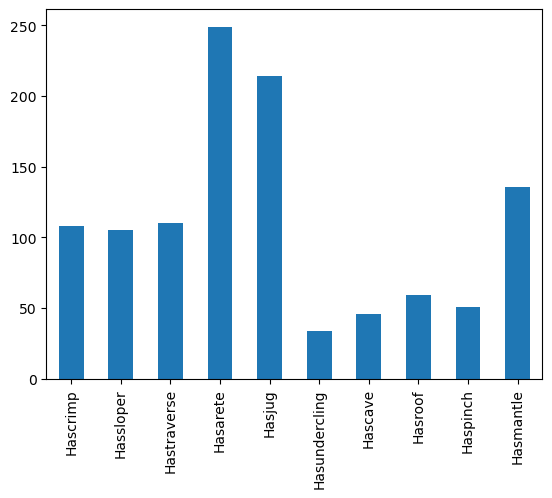

In [8]:
countsdf = df[['Hascrimp', 'Hassloper', 'Hastraverse', 'Hasarete', 'Hasjug', 
               'Hasundercling', 'Hascave', 'Hasroof', 'Haspinch', 'Hasmantle']].sum()
countsdf.columns= ['Feature', 'Count']

ax = countsdf.plot.bar()
# we can see from this barplot that lots of climbs have aretes and jugs
# understandably, we also have a low number of cave/roof climbs and underclings.

In [10]:
# need to change grade system to just numbers and not with V
# lets use this documentation re.findall('\d+', str)


def update_rating(rating):
    # Finds the first sequence of digits in the rating and converts to integer
    match = re.search(r'\d+', str(rating))
    return int(match.group()) if match else None

df['Rating'] = df['Rating'].apply(update_rating)
df.head()

,Route,Location,URL,Avg Stars,Your Stars,Route Type,Rating,Pitches,Length,Area Latitude,...,Hascrimp,Hassloper,Hastraverse,Hasarete,Hasjug,Hasundercling,Hascave,Hasroof,Haspinch,Hasmantle
0,White Rastafarian,White Rastafarian Boulder > Outback Bouldering...,https://www.mountainproject.com/route/10572259...,3.9,-1,Boulder,2.0,1,20.0,34.02073,...,0,0,0,1,1,0,0,0,0,0
1,Slashface,Slash Boulder > Western Belt > Geology Tour Ro...,https://www.mountainproject.com/route/10572275...,3.9,-1,Boulder,3.0,1,25.0,33.95344,...,0,0,0,0,1,0,0,0,0,0
2,Pigpen,Pigpen Boulder > Manx Boulders Circuit > Manx/...,https://www.mountainproject.com/route/10572299...,3.9,-1,Boulder,4.0,1,10.0,34.01530,...,0,0,0,0,0,0,1,1,0,0
3,JBMFP,JBMF Boulder > JBMF Boulders > Roadside Rocks ...,https://www.mountainproject.com/route/10572546...,3.9,-1,Boulder,5.0,1,16.0,34.01520,...,0,0,0,0,0,0,0,0,0,0
4,Gunsmoke,Gunsmoke Wall > Gunsmoke Area > Barker Dam Bou...,https://www.mountainproject.com/route/10572235...,3.7,-1,Boulder,3.0,1,80.0,34.02858,...,0,0,1,0,0,0,0,0,0,0


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

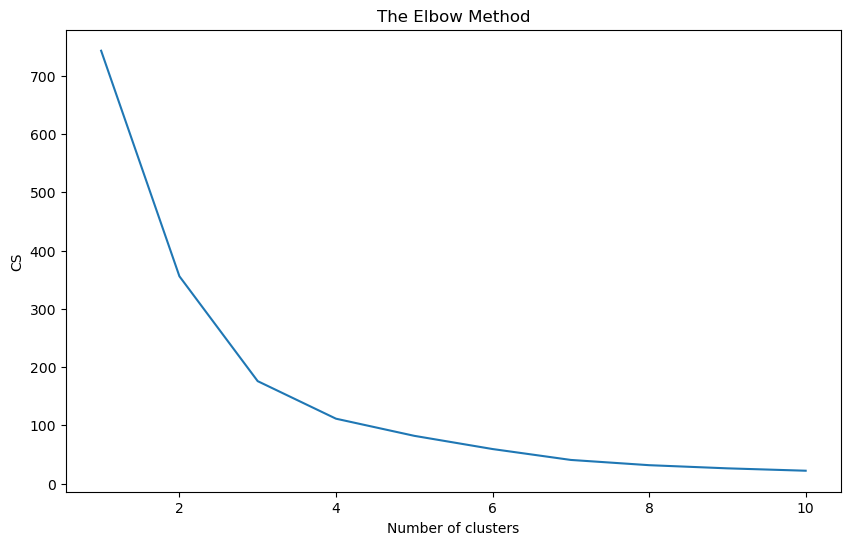

,Route,Rating,Length,HasTraverse,HasSloper,Hascrimp,Hassloper,Hastraverse,Hasarete,Hasjug,Hasundercling,Hascave,Hasroof,Haspinch,Hasmantle
0,White Rastafarian,2.0,20.0,0,0,0,0,0,1,1,0,0,0,0,0
1,Slashface,3.0,25.0,0,0,0,0,0,0,1,0,0,0,0,0
2,Pigpen,4.0,10.0,0,0,0,0,0,0,0,0,1,1,0,0
3,JBMFP,5.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0
4,Gunsmoke,3.0,80.0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Turnbuckle Left Arete,2.0,10.0,0,0,0,0,0,1,0,0,0,0,0,0
810,Ramp Line,0.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0
811,The Ayatollah of Rock and Rolla,0.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0
812,Dysfunction,1.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
mldata = df.copy()
mldata = mldata.dropna()  # Example: dropping rows with missing values
mldata = mldata.reset_index(drop = True)
mldata = mldata.drop(columns = ['Avg Stars', 'Location', 'URL', 'Your Stars', 'Route Type','Pitches', 'Area Latitude', 'Area Longitude', 'Description'])

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(mldata.drop('Route', axis=1))


from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(similarity_matrix)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

mldata

In [16]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data = similarity_matrix
pca = PCA(2)

transform = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
#Getting unique labels
u_labels = np.unique(label)

display (label)
display (u_labels)

data={'Route':mldata['Route'],'Cluster':label}
route_list=pd.DataFrame(data)
route_list

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([3, 3, 2, 2, 0, 3, 3, 0, 2, 3, 2, 0, 2, 3, 0, 3, 2, 3, 2, 3, 3, 1,
       3, 2, 3, 2, 3, 3, 2, 3, 0, 2, 0, 2, 3, 0, 1, 0, 3, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 3, 3, 2, 0, 3, 1, 2, 0, 0, 1, 0, 3, 0, 2, 2, 0, 3, 1,
       3, 2, 3, 2, 3, 0, 3, 3, 3, 2, 2, 0, 3, 2, 0, 3, 0, 2, 0, 0, 3, 0,
       3, 2, 0, 0, 2, 3, 2, 2, 2, 3, 2, 0, 3, 2, 3, 3, 2, 0, 3, 3, 2, 0,
       3, 3, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2,
       2, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 3, 1, 2, 2, 3, 3, 0, 3, 3, 0, 2,
       3, 2, 3, 3, 1, 2, 3, 0, 2, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 0, 3,
       0, 0, 3, 3, 3, 0, 0, 2, 2, 3, 3, 3, 2, 0, 0, 3, 3, 3, 3, 0, 0, 2,
       2, 2, 3, 3, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 3, 3, 3, 3, 3, 2,
       0, 0, 0, 2, 3, 0, 3, 0, 3, 2, 3, 3, 3, 2, 3, 3, 1, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 2, 0, 1, 0, 3, 1, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 0, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 3, 3, 2, 2, 3, 3, 3, 0,

array([0, 1, 2, 3])

,Route,Cluster
0,White Rastafarian,3
1,Slashface,3
2,Pigpen,2
3,JBMFP,2
4,Gunsmoke,0
...,...,...
809,Turnbuckle Left Arete,3
810,Ramp Line,0
811,The Ayatollah of Rock and Rolla,0
812,Dysfunction,3


In [42]:
#### from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

data_point = transform[10]

data_point_cluster = kmeans.predict([data_point])[0]
cluster_points = transform[kmeans.labels_ == data_point_cluster]
distances = euclidean_distances([data_point], cluster_points)
nearest_indices = np.argsort(distances[0])[:]  # Find the 2 nearest neighbors

nearest_points = cluster_points[nearest_indices]

In [44]:
def n_nearest_routes(input_route, N):
    names = []
    # find the index of our input_route
    input_index = route_list[route_list['Route'] == input_route].index
    input_point = transform[input_index][0]
    
    # find N points most similar to our input_point
    data_point_cluster = kmeans.predict([input_point])[0]
    cluster_points = transform[kmeans.labels_ == data_point_cluster]
    distances = euclidean_distances([input_point], cluster_points)
    nearest_indices = np.argsort(distances[0])[1:N+1] 
    nearest_indices.tolist()
    
    # find names of routes
    for i in nearest_indices.tolist():
        names.append(route_list.loc[i, 'Route'])
    
    return names

In [48]:
n_nearest_routes('Nicole Overhang', 5)

["Ryan's Roof", 'Spud Crack', 'Yeah April', 'Hobbit Hole Offwidth', 'Pinhead']

In [24]:
index = route_list[route_list['Route'] == 'White Rastafarian'].index
print(index)

Index([0], dtype='int64')


In [26]:
kmeans.cluster_centers_

array([[-0.52038658,  0.36451945],
       [ 3.27940154,  0.70552449],
       [ 0.85710273, -0.37451741],
       [-0.18339037, -0.25427797]])

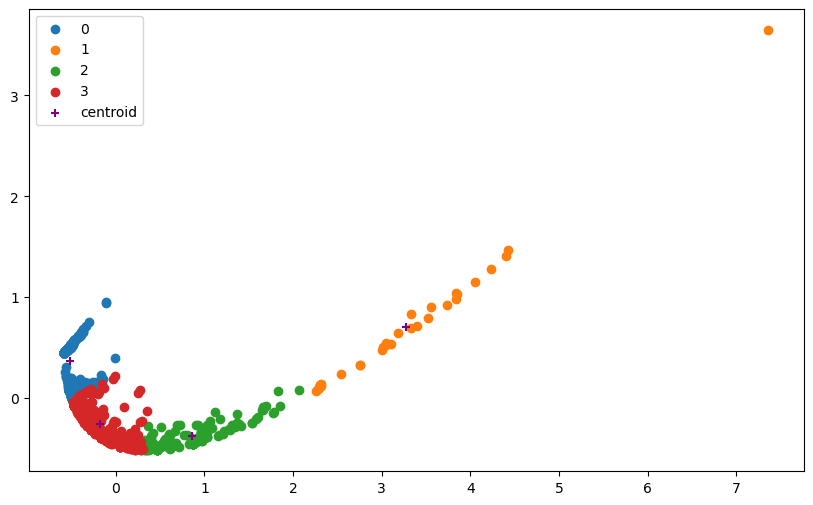

In [28]:
plt.figure(figsize=(10,6))
for i in u_labels:
    plt.scatter(transform[label == i , 0] , transform[label == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.legend()
plt.savefig('cluster.png')
plt.show()

In [71]:
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Drop any irrelevant columns or handle missing values if needed
mldata = df.copy()
mldata = mldata.dropna()  # Example: dropping rows with missing values
mldata = mldata.drop(columns = ['Location', 'URL', 'Your Stars', 'Route Type','Pitches', 'Area Latitude', 'Area Longitude', 'Description'])



                

# Standardize the data (important for distance-based algorithms)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mldata)

# Set the number of clusters (choose based on your data or experiment with it)
kmeans = KMeans(n_clusters=4, random_state=42)
mldata['Cluster'] = kmeans.fit_predict(data_scaled)

# View the clustered data
print(mldata.head())

# Reduce to 2D for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=mldata['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering')
plt.colorbar()
plt.show()

KeyError: "['PitchesArea Latitude'] not found in axis"